### 평균이동 알고리즘 (Mean Shift)
#### - 군집 중심점을 평균 거리의 중심이 아니라 확률 밀도 함수가 피크인 점(KDE 활용)으로 선정
#### - MeanShift는 군집의 개수를 정하는 것이 아니라 대역폭 bandwidth의 크기에 따라 군집화를 수행 -> estimate_bandwidth() 꼭 하기

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.datasets import make_blobs #군집화 세트 
from sklearn.cluster import MeanShift, estimate_bandwidth #평균 이동 알고리즘 

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

#대역폭 0.8로 설정 -> 너무 작으면 과적합 되기 쉽다. 
meanshift = MeanShift(bandwidth=0.8) 
cluster_labels=meanshift.fit_predict(X) 
np.unique(cluster_labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5]), array([57, 60, 51, 15, 10,  7]))

#### 군집화 개수가 6개로 분류되어 지나치게 세분화되었다 -> 과대적합 

In [13]:
#대역폭 변경(bandwidth = 1)
meanshift= MeanShift(bandwidth=1)
np.unique(meanshift.fit_predict(X), return_counts=True)

(array([0, 1, 2]), array([67, 67, 66]))

#### 군집화 개수가 3개로 적절히 군집화되었다. - > 최적의 대역폭 값 설정 필수
#### - estimate_bandwidth()

In [14]:
best_bwt = estimate_bandwidth(X)
print('최적의 bandwidth: ',np.round(best_bwt,3))

최적의 bandwidth:  1.816


In [15]:
#적절한 대역폭으로 군집화 
best_meanshift = MeanShift(bandwidth=best_bwt) 
print('best bandwidth 후 cluster: ', np.unique(best_meanshift.fit_predict(X), return_counts=True))

best bandwidth 후 cluster:  (array([0, 1, 2]), array([67, 67, 66]))


In [16]:
# 군집화 후 시각화 
clusterDF=pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target']=y 
clusterDF['cluster']=best_meanshift.fit_predict(X)
clusterDF

,ftr1,ftr2,target,cluster
0,-1.671737,3.534007,2,2
1,0.732732,4.413232,0,0
2,1.084733,4.568501,0,0
3,-1.458497,3.325950,2,2
4,1.185037,5.232257,0,0
...,...,...,...,...
195,2.843913,0.141712,1,1
196,-2.005712,4.079568,2,2
197,2.692393,1.119716,1,1
198,1.195417,3.705920,0,0


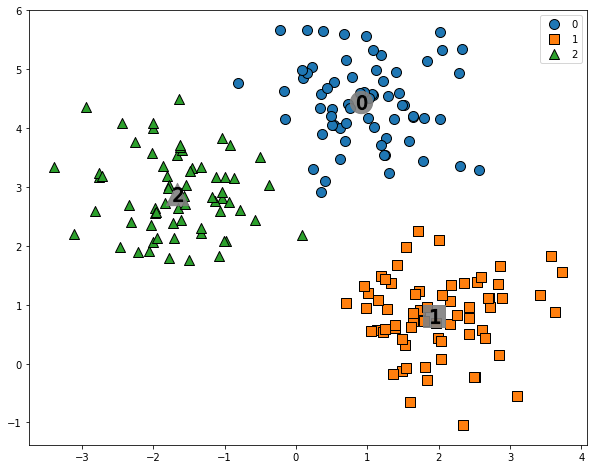

In [17]:
centers = best_meanshift.cluster_centers_ #군집 중심 좌표
 
plt.figure(figsize=(10,8))  
markers=['o','s','^']
for i in np.unique(clusterDF['cluster']).tolist():
    plt.scatter(x= clusterDF[clusterDF['cluster']==i]['ftr1'], y= clusterDF[clusterDF['cluster']==i]['ftr2'], marker=markers[i], label=str(i),edgecolor='k', s=100)  
    #군집별 중심좌표 표현
    plt.scatter(x= centers[i][0], y= centers[i][1], s=500, color='gray', alpha=0.9, marker=markers[i]) #배경
    plt.scatter(x= centers[i][0], y= centers[i][1], s=200, edgecolors='k', color='k', marker='$%d$' %i) #글씨
    
plt.legend() 
plt.show()

In [18]:
clusterDF.groupby(['target'])['cluster'].value_counts() 

target  cluster
0       0          67
1       1          67
2       2          66
Name: cluster, dtype: int64

#### 예측값과 실제값이 1:1로 잘 매칭되었다. 